# 1. Import & Data Check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import missingno as msno
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_train = pd.read_csv("../input/bike-sharing-demand/train.csv", parse_dates=["datetime"])
df_test = pd.read_csv("../input/bike-sharing-demand/test.csv", parse_dates=["datetime"])

In [3]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- 총 12개의 col (datetime, int, float 데이터)

In [5]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Skewness: 1.242066
Kurtosis: 1.300093


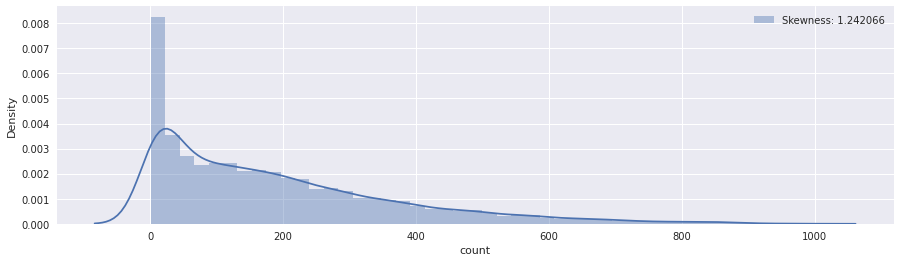

In [6]:
f, ax = plt.subplots(1, 1, figsize=(15, 4))
g = sns.distplot(df_train["count"], label="Skewness: {:2f}".format(df_train["count"].skew()), ax=ax)
g = g.legend(loc="best")

print("Skewness: %f" %df_train["count"].skew())
print("Kurtosis: %f" %df_train["count"].kurt())

# count가 대부분 0에 몰려 있구나

- skewness (비대칭도, 왜도)
  - 분포가 얼마나 비대칭한가


- kurtosis (첨도)
  - 확률분포의 뾰족한 정도를 나타내는 척도
  - 어디에 집중적으로 중심에 몰려 있는가

# 2. EDA

In [7]:
print(df_train.shape)

df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second

df_test["year"] = df_test["datetime"].dt.year
df_test["month"] = df_test["datetime"].dt.month
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour
df_test["minute"] = df_test["datetime"].dt.minute
df_test["second"] = df_test["datetime"].dt.second

print(df_train.shape)

(10886, 12)
(10886, 18)


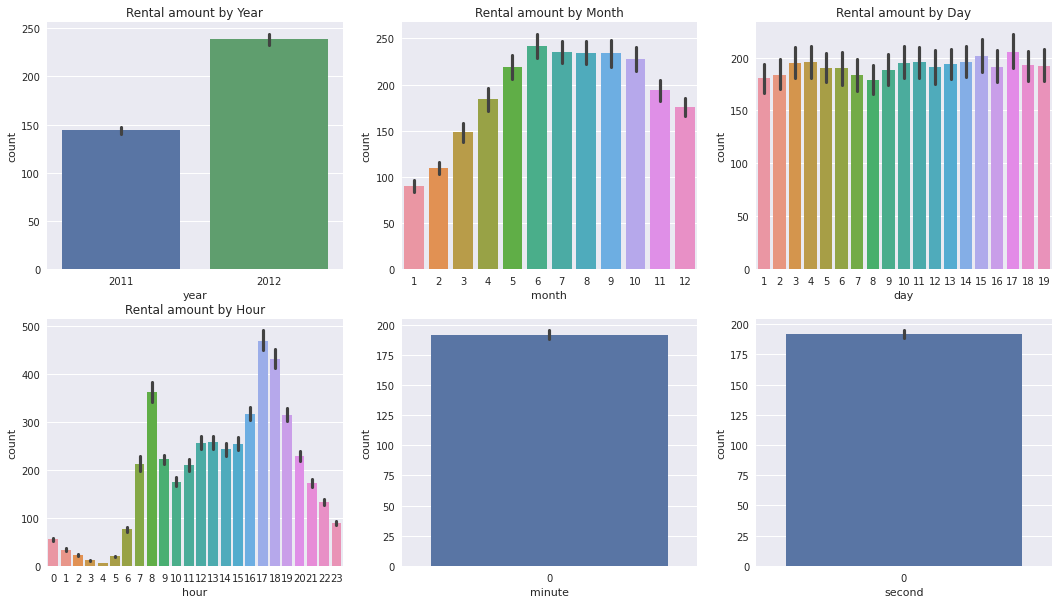

In [8]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 10)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)
sns.barplot(data=df_train, x="month", y="count", ax=ax2)
sns.barplot(data=df_train, x="day", y="count", ax=ax3)
sns.barplot(data=df_train, x="hour", y="count", ax=ax4)
sns.barplot(data=df_train, x="minute", y="count", ax=ax5)
sns.barplot(data=df_train, x="second", y="count", ax=ax6)

ax1.set(ylabel="count", title="Rental amount by Year")
ax2.set(ylabel="count", title="Rental amount by Month")
ax3.set(ylabel="count", title="Rental amount by Day")
ax4.set(ylabel="count", title="Rental amount by Hour")

plt.show()

- year : 2011년 < 2012년
- month : 겨울 < 여름
- day : 1~19 데이터만 존재
- hour : 출퇴근시간
- minute, second는 상관 x

In [9]:
df_train["weekday"] = df_train["datetime"].dt.dayofweek
df_test["weekday"] = df_test["datetime"].dt.dayofweek

df_train.shape

(10886, 19)

In [10]:
df_train["weekday"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: weekday, dtype: int64

- 0: 월요일 ~ 6: 일요일

<AxesSubplot:xlabel='hour', ylabel='count'>

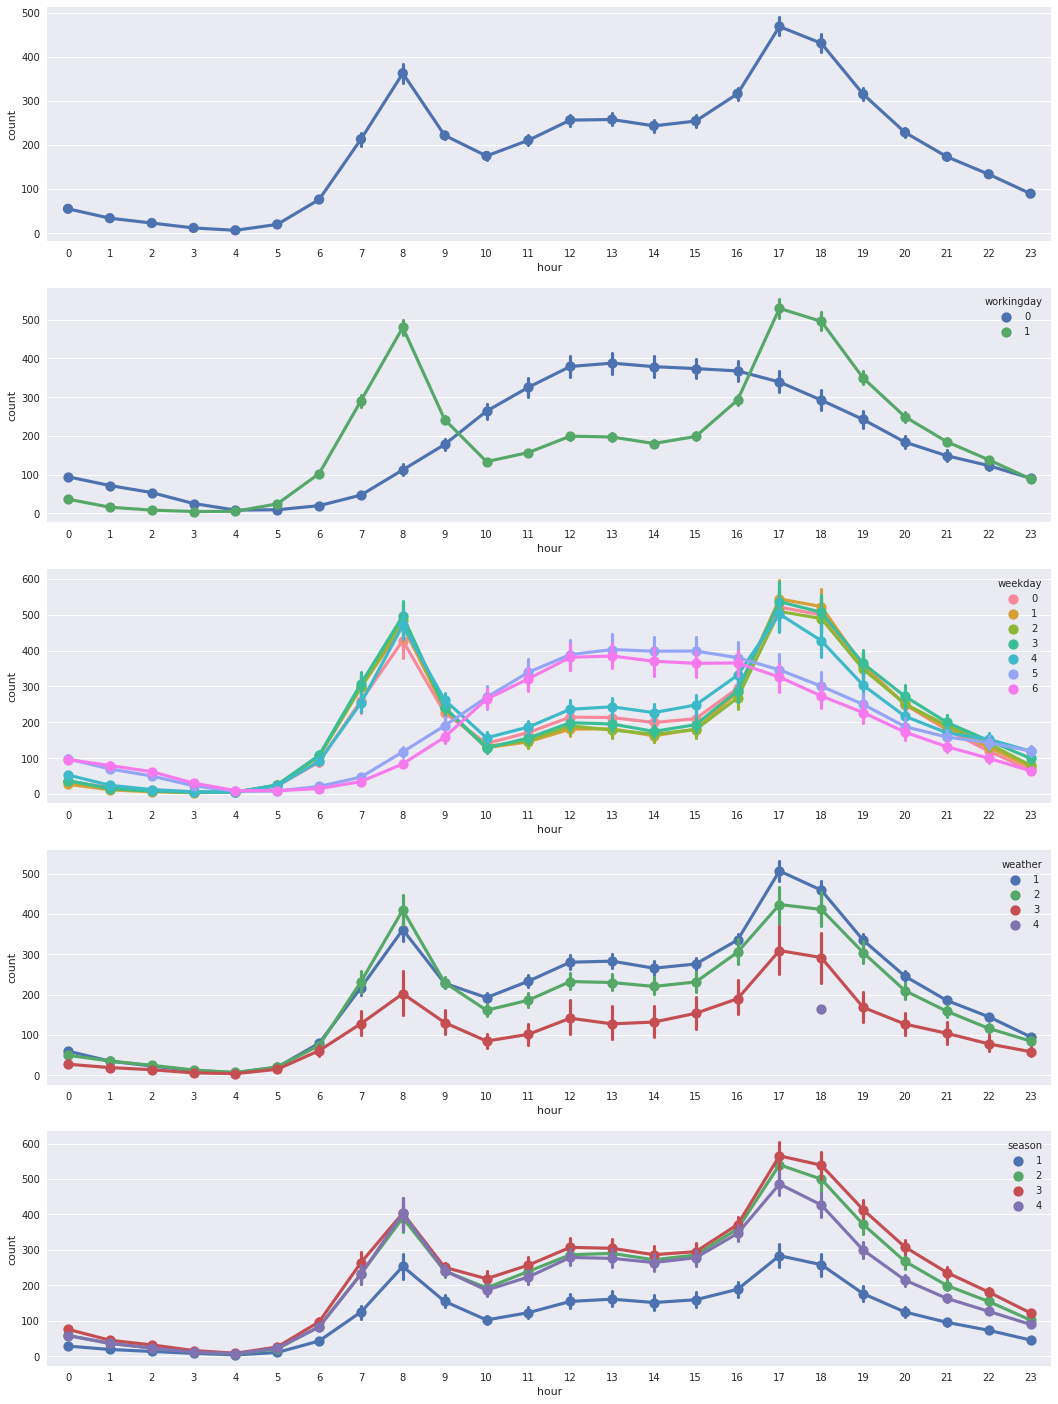

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data=df_train, x="hour", y="count", ax=ax1)
sns.pointplot(data=df_train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=df_train, x="hour", y="count", hue="weekday", ax=ax3)
sns.pointplot(data=df_train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=df_train, x="hour", y="count", hue="season", ax=ax5)

- 2, 3번째 그래프를 통해 출퇴근시간에 대여량이 는다는 것을 볼 수 있다.
- 4번째 그래프를 통해 날씨에는 영향 x
- 5번째 그래프를 통해 봄에 대여량 적음

In [12]:
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
weekday                int64
dtype: object

<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

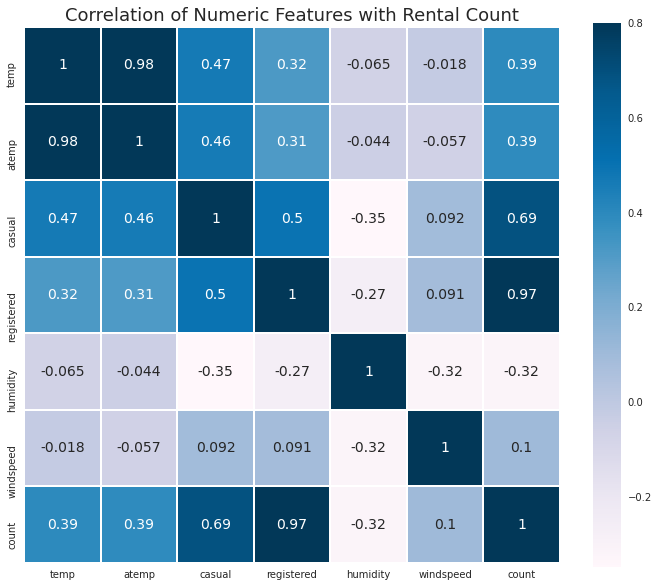

In [13]:
# 수치형 데이터들의 상관관계

corr_data = df_train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
colormap = plt.cm.PuBu

f, ax = plt.subplots(figsize = (12,10)) 
plt.title('Correlation of Numeric Features with Rental Count', y=1, size=18)
sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1, 
            square=True, annot=True, cmap=colormap, 
            linecolor="white", annot_kws= {'size':14})

- count와 registered은 깊은 상관관계
  - test set에는 없음
- temp, atemp, humidity, windspeed는 거의 관계가 없다.

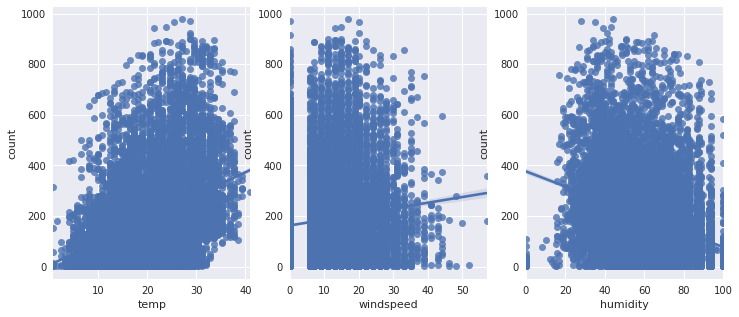

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

sns.regplot(x="temp", y="count", data=df_train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=df_train, ax=ax2)
sns.regplot(x="humidity", y="count", data=df_train, ax=ax3)

plt.show()

- heatmap을 통해 유의미하지 않다고 판단된 변수에 대해 scatterplot 그려보기
- windspeed는 0에 데이터가 많이 몰려있다.
  - 실제로 값이 0이 아니라, null값을 0으로 대체한 것 아닐까?
  - 후에 feature engineering에서 고쳐주기

In [15]:
# year과 month 데이터 붙여주기

def concat_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

df_train["year_month"] = df_train["datetime"].apply(concat_year_month)
df_test["year_month"] = df_test["datetime"].apply(concat_year_month)

print(df_train.shape)
df_train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

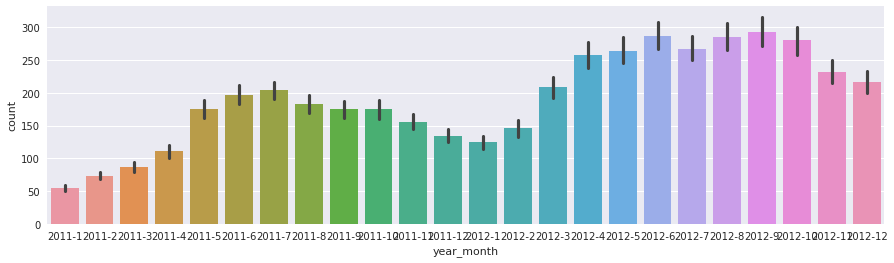

In [16]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.barplot(data=df_train, x="year_month", y="count")

- 두 해 모두 여름의 대여량이 높다.
- 전체적으로 갈수록 대여량이 증가하는 추세

In [17]:
# 데이터셋의 이상치 제거

from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_ouliers = list(k for k, v in outlier_indices.items() if v>n)
    
    return multiple_ouliers

Outliers_to_drop = detect_outliers(df_train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])


# train 셋의 이상치 제거하기
# 제거 방법은 IQR 사용

In [18]:
# 이상치로 탐색된 항들

df_train.loc[Outliers_to_drop].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4


In [19]:
df_train = df_train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
df_train.shape

(10846, 20)

In [20]:
# 첨도와 왜도 확인하기

df_train_num = df_train[["count", "temp", "atemp", "casual", "registered", "humidity", "windspeed"]]

for col in df_train_num:
    print("{:15}".format(col),
         "Skewness: {:05.2f}".format(df_train[col].skew()),
         "Kurtosis: {:06.2f}".format(df_train[col].kurt())
         )

count           Skewness: 01.21 Kurtosis: 001.20
temp            Skewness: 00.01 Kurtosis: -00.91
atemp           Skewness: -0.10 Kurtosis: -00.85
casual          Skewness: 02.52 Kurtosis: 007.74
registered      Skewness: 01.51 Kurtosis: 002.61
humidity        Skewness: -0.09 Kurtosis: -00.76
windspeed       Skewness: 00.58 Kurtosis: 000.63


# 3. Feature Engineering

Skewness: 1.210923
Kurtosis: 1.200871


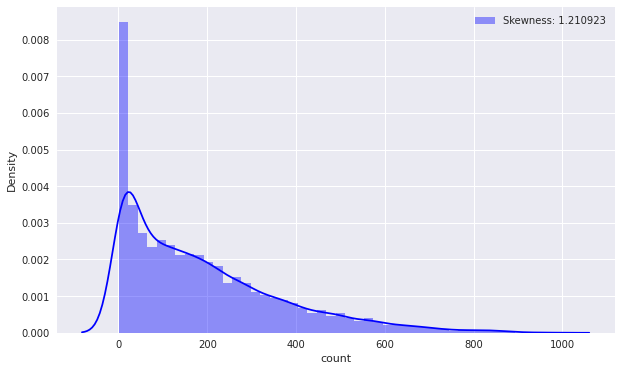

In [21]:
f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(df_train["count"], color = "b", label="Skewness: {:2f}".format(df_train["count"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % df_train["count"].skew()) 
print("Kurtosis: %f" % df_train["count"].kurt())

- distplot이 0에 많이 치우쳐져있다.
    -> Log Scaling을 통해 정규화 시켜주자

Skewness: -0.975198
Kurtosis: 0.247435


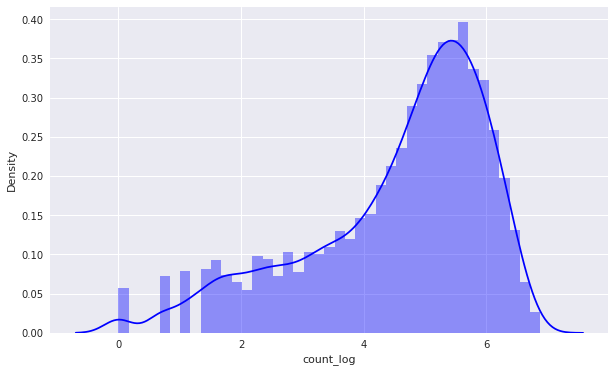

In [22]:
df_train["count_log"] = df_train["count"].map(lambda i: np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.distplot(df_train["count_log"], color="b", label="Skewness: {:2f}".format(df_train["count_log"].skew()), ax=ax)

print("Skewness: %f" %df_train["count_log"].skew())
print("Kurtosis: %f" %df_train["count_log"].kurt())

df_train.drop("count", axis=1, inplace=True)

- 타겟 변수인 count에 log를 취해준 모습

In [23]:
# 풍속이 0인 변수들

trainWind0 = df_train.loc[df_train["windspeed"] == 0]
trainWindnot0 = df_train.loc[df_train["windspeed"] != 0]

In [24]:
from sklearn.ensemble import RandomForestClassifier 

def predict_windspeed(data): 
    dataWind0 = data.loc[data["windspeed"] == 0] 
    dataWindnot0 = data.loc[data["windspeed"] != 0] 
    
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"] 
    
    dataWindnot0["windspeed"] = dataWindnot0["windspeed"].astype("str") 
    
    rf_wind = RandomForestClassifier() 
    rf_wind.fit(dataWindnot0[wcol], dataWindnot0["windspeed"]) 
    wind0 = rf_wind.predict(X=dataWind0[wcol]) 
    
    predictWind0 = dataWind0 
    predictWindnot0 = dataWindnot0 
    
    predictWind0["windspeed"] = wind0 
    
    data = predictWindnot0.append(predictWind0) 
    
    data["windspeed"] = data["windspeed"].astype("float") 
    
    data.reset_index(inplace = True) 
    data.drop("index", inplace = True, axis = 1) 
    
    return data



<AxesSubplot:xlabel='windspeed', ylabel='count'>

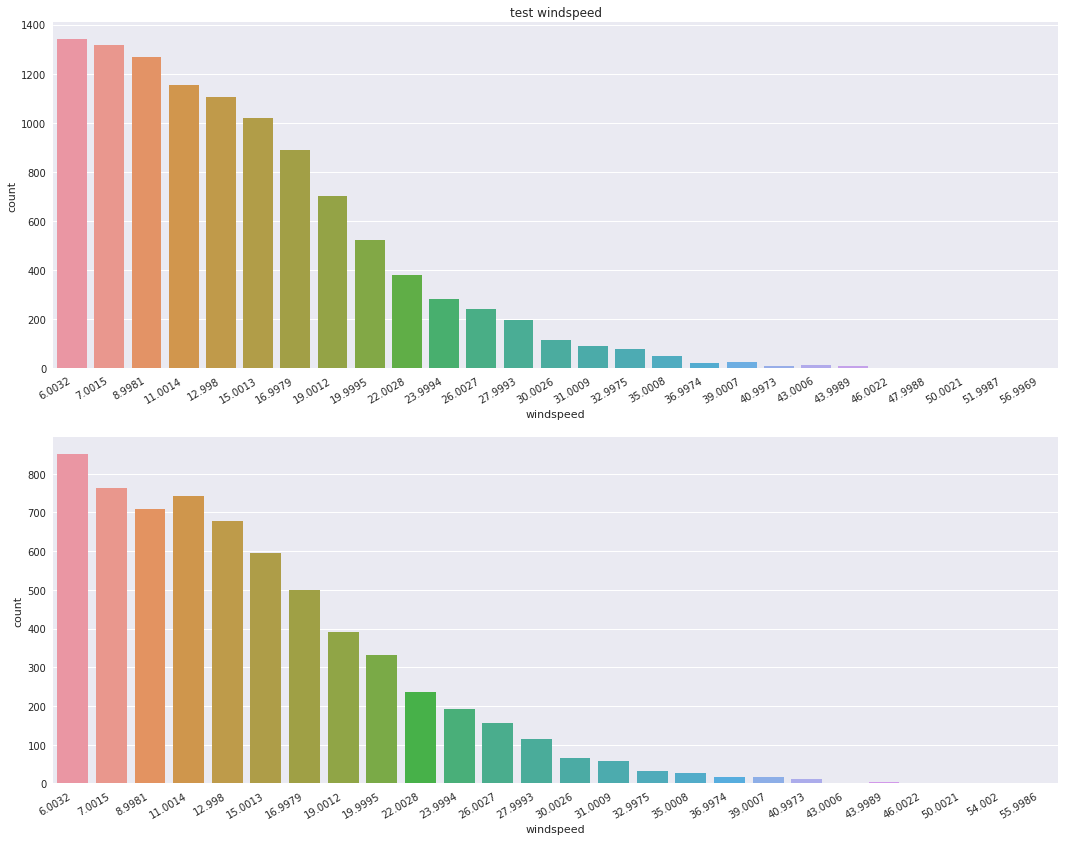

In [25]:
# 다시 본래의 데이터프레임에 예측된 windspeed 넣어주기

df_train = predict_windspeed(df_train) 
df_test = predict_windspeed(df_test) 

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14)) 

plt.sca(ax1) 
plt.xticks(rotation = 30, ha = "right") 
ax1.set(ylabel = "count", title = "train windspeed") 
sns.countplot(data = df_train, x = "windspeed", ax = ax1) 

plt.sca(ax2) 
plt.xticks(rotation = 30, ha = "right") 
ax1.set(ylabel = "count", title = "test windspeed") 
sns.countplot(data = df_test, x = "windspeed", ax = ax2)

# 예측된 값들이 잘 들어갔다!

In [26]:
corr_data = df_train[["count_log", "windspeed"]]
corr_data.corr()

,count_log,windspeed
count_log,1.000000,0.125863
windspeed,0.125863,1.000000


In [27]:
# categoryical feature들을 one hot encoding 해주기

df_train = pd.get_dummies(
    df_train, columns=["weather"], prefix="weather")
df_test = pd.get_dummies(
    df_test, columns=["weather"], prefix="weather")

df_train = pd.get_dummies(
    df_train, columns=["season"], prefix="season")
df_test = pd.get_dummies(
    df_test, columns=["season"], prefix="season")

In [28]:
datetime_test = df_test["datetime"]

df_train.drop(["datetime", "registered","casual","holiday", "year_month", "minute", "second"], axis = 1, inplace = True) 
df_test.drop(["datetime","holiday", "year_month", "minute", "second"], axis = 1, inplace = True)

# 4. Modeling & Make Submission

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = df_train.drop("count_log", axis=1).values
target_label = df_train["count_log"].values
X_test = df_test.values
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2000)

- train_test_split을 통해 데이터셋을 학습용, 검증용으로 나누기
- 타겟 변수인 count_log 제외한 나머지 변수를 X_train에, count_log의 값을 target_label이라는 새로운 변수에 저장
- X_test는 캐글에서 제공되는 테스트 데이터 셋의 값들을 저장
- 검증 데이터셋을 전체 train 데이터 셋의 20%로 지정

In [30]:
# regressor 만들고 분리해둔 학습용 데이터를 통해 학습시켜주기

from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=2000, 
                                      learning_rate=0.05,
                                     max_depth=4,
                                     min_samples_leaf=15,
                                     min_samples_split=10,
                                     random_state=42)

regressor.fit(X_tr, y_tr)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

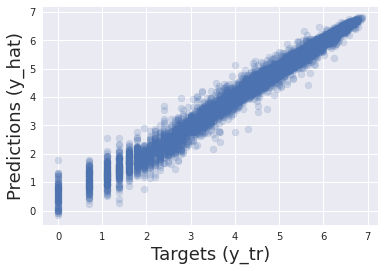

In [31]:
# 학습용 데이터셋이 얼마나 잘 적합되었는지 확인하기

y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha=0.2)
plt.xlabel("Targets (y_tr)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.show()

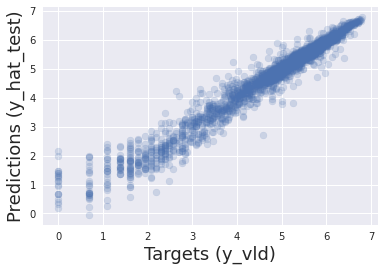

In [32]:
# 같은 방법으로 검증용 데이터셋도 확인하기

y_hat_test = regressor.predict(X_vld) 

plt.scatter(y_vld, y_hat_test, alpha=0.2) 
plt.xlabel('Targets (y_vld)',size=18) 
plt.ylabel('Predictions (y_hat_test)',size=18) 
plt.show()

In [33]:
use_logvals = 1

pred_gb = regressor.predict(X_test)

sub_gb = pd.DataFrame()
sub_gb["datetime"] = datetime_test
sub_gb["count"] = pred_gb

if use_logvals == 1:
    sub_gb["count"] = np.exp(sub_gb["count"])

sub_gb.to_csv("gb.csv", index=False)